In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os

In [2]:
# load the data
df = pd.read_csv('Data/mostStarredRepos.csv')
df.head()

,id,name,owner_user,owner_type,description,url,is_fork,date_created,date_updated,date_pushed,...,has _discussions,num_forks,is_archived,is_disabled,is_template,license,allows_forking,open_issues_count,open_issues,topics
0,54346799,public-apis,public-apis,Organization,A collective list of free APIs,https://api.github.com/repos/public-apis/publi...,False,2016-03-20T23:49:42Z,2024-02-09T20:07:51Z,2024-02-07T04:55:57Z,...,False,31309,False,False,False,MIT License,True,237,237,"['api', 'apis', 'dataset', 'development', 'fre..."
1,83222441,system-design-primer,donnemartin,User,Learn how to design large-scale systems. Prep ...,https://api.github.com/repos/donnemartin/syste...,False,2017-02-26T16:15:28Z,2024-02-09T20:04:25Z,2024-01-16T22:15:13Z,...,False,42633,False,False,False,Other,True,415,415,"['design', 'design-patterns', 'design-system',..."
2,21289110,awesome-python,vinta,User,"A curated list of awesome Python frameworks, l...",https://api.github.com/repos/vinta/awesome-python,False,2014-06-27T21:00:06Z,2024-02-09T20:18:54Z,2024-02-05T12:23:07Z,...,False,24648,False,False,False,Other,True,419,419,"['awesome', 'collections', 'python', 'python-f..."
3,63476337,Python,TheAlgorithms,Organization,All Algorithms implemented in Python,https://api.github.com/repos/TheAlgorithms/Python,False,2016-07-16T09:44:01Z,2024-02-09T20:06:24Z,2024-02-05T19:48:15Z,...,True,43858,False,False,False,MIT License,True,224,224,"['algorithm', 'algorithm-competitions', 'algor..."
4,123458551,Python-100-Days,jackfrued,User,Python - 100天从新手到大师,https://api.github.com/repos/jackfrued/Python-...,False,2018-03-01T16:05:52Z,2024-02-09T18:54:08Z,2024-01-28T22:33:10Z,...,False,51102,False,False,False,No license,True,706,706,[]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1200 non-null   int64 
 1   name               1200 non-null   object
 2   owner_user         1200 non-null   object
 3   owner_type         1200 non-null   object
 4   description        1200 non-null   object
 5   url                1200 non-null   object
 6   is_fork            1200 non-null   bool  
 7   date_created       1200 non-null   object
 8   date_updated       1200 non-null   object
 9   date_pushed        1200 non-null   object
 10  size               1200 non-null   int64 
 11  stars              1200 non-null   int64 
 12  watchers           1200 non-null   int64 
 13  updated_at         1200 non-null   object
 14  language           1200 non-null   object
 15  has_issues         1200 non-null   bool  
 16  has_projects       1200 non-null   bool  


In [4]:
# Drop the columns that are not needed
df = df.drop(['is_archived', 'is_disabled', 'license', 'has_pages', 'owner_type', 'has_projects', 'is_template', 'has _discussions', 'allows_forking', 'date_updated', 'size', 'is_fork', 'date_pushed', 'watchers', 'updated_at', 'has_wiki', 'open_issues_count'], axis=1)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1200 non-null   int64 
 1   name           1200 non-null   object
 2   owner_user     1200 non-null   object
 3   description    1200 non-null   object
 4   url            1200 non-null   object
 5   date_created   1200 non-null   object
 6   stars          1200 non-null   int64 
 7   language       1200 non-null   object
 8   has_issues     1200 non-null   bool  
 9   has_downloads  1200 non-null   bool  
 10  num_forks      1200 non-null   int64 
 11  open_issues    1200 non-null   int64 
 12  topics         1200 non-null   object
dtypes: bool(2), int64(4), object(7)
memory usage: 105.6+ KB


(1200, 13)

/var/folders/cv/7plhz1gs47ggc8534599rnhc0000gn/T/ipykernel_95508/1431901806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


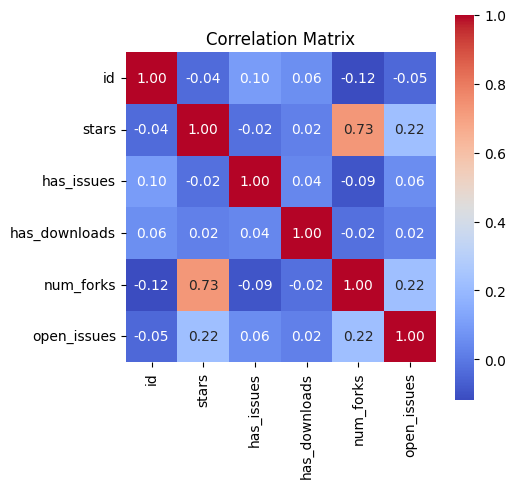

In [5]:
# make a correlation matrix with matplot to see if there are any correlations between the variables
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing and Feature Engineering

In [6]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_values

id               0
name             0
owner_user       0
description      0
url              0
date_created     0
stars            0
language         0
has_issues       0
has_downloads    0
num_forks        0
open_issues      0
topics           0
dtype: int64

### Feature Engineering

In [7]:
from datetime import datetime

# Converting 'date_created' from object type to datetime
df['date_created'] = pd.to_datetime(df['date_created'])

# Defining current_date as timezone-naive
current_date = pd.to_datetime("now").tz_localize(None)

# Ensuring 'date_created' is also timezone-naive
df['date_created'] = df['date_created'].dt.tz_localize(None)

# Recalculating the age of the repository
df['repo_age_days'] = (current_date - df['date_created']).dt.days

# Converting 'repo_age_days' to a PyTorch tensor
repo_age_days_tensor = torch.tensor(df['repo_age_days'].values)

# Displaying the first few rows of the dataframe with the new column and the shape of the tensor
df[['name', 'date_created', 'repo_age_days']].head(), repo_age_days_tensor.shape

/var/folders/cv/7plhz1gs47ggc8534599rnhc0000gn/T/ipykernel_95508/3620541442.py:7: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_date = pd.to_datetime("now").tz_localize(None)


(                   name        date_created  repo_age_days
 0           public-apis 2016-03-20 23:49:42           2882
 1  system-design-primer 2017-02-26 16:15:28           2539
 2        awesome-python 2014-06-27 21:00:06           3514
 3                Python 2016-07-16 09:44:01           2765
 4       Python-100-Days 2018-03-01 16:05:52           2172,
 torch.Size([1200]))

In [8]:
# Calculating the age of the repository in years
df['repo_age_years'] = df['repo_age_days'] / 365.25

# Converting 'repo_age_years' to a PyTorch tensor
repo_age_years_tensor = torch.tensor(df['repo_age_years'].values)

# Displaying the first few rows of the dataframe with the new column and the shape of the tensor
df[['name', 'date_created', 'repo_age_days', 'repo_age_years']].head(), repo_age_years_tensor.shape

(                   name        date_created  repo_age_days  repo_age_years
 0           public-apis 2016-03-20 23:49:42           2882        7.890486
 1  system-design-primer 2017-02-26 16:15:28           2539        6.951403
 2        awesome-python 2014-06-27 21:00:06           3514        9.620808
 3                Python 2016-07-16 09:44:01           2765        7.570157
 4       Python-100-Days 2018-03-01 16:05:52           2172        5.946612,
 torch.Size([1200]))

In [9]:
# Removing the 'repo_age_days' column and keeping only the 'repo_age_years' column
df.drop('repo_age_days', axis=1, inplace=True)

# Displaying the first few rows of the dataframe with the 'repo_age_years' column
df[['name', 'date_created', 'repo_age_years']].head()

,name,date_created,repo_age_years
0,public-apis,2016-03-20 23:49:42,7.890486
1,system-design-primer,2017-02-26 16:15:28,6.951403
2,awesome-python,2014-06-27 21:00:06,9.620808
3,Python,2016-07-16 09:44:01,7.570157
4,Python-100-Days,2018-03-01 16:05:52,5.946612


### Encoding

In [10]:
# One-hot encoding of categorical variables
categorical_columns = ['language']
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,id,name,owner_user,description,url,date_created,stars,has_issues,has_downloads,num_forks,...,language_Kotlin,language_Nix,language_PHP,language_Python,language_Ruby,language_Rust,language_Scala,language_Shell,language_Swift,language_TypeScript
0,54346799,public-apis,public-apis,A collective list of free APIs,https://api.github.com/repos/public-apis/publi...,2016-03-20 23:49:42,278839,True,True,31309,...,0,0,0,1,0,0,0,0,0,0
1,83222441,system-design-primer,donnemartin,Learn how to design large-scale systems. Prep ...,https://api.github.com/repos/donnemartin/syste...,2017-02-26 16:15:28,245714,True,True,42633,...,0,0,0,1,0,0,0,0,0,0
2,21289110,awesome-python,vinta,"A curated list of awesome Python frameworks, l...",https://api.github.com/repos/vinta/awesome-python,2014-06-27 21:00:06,197203,False,True,24648,...,0,0,0,1,0,0,0,0,0,0
3,63476337,Python,TheAlgorithms,All Algorithms implemented in Python,https://api.github.com/repos/TheAlgorithms/Python,2016-07-16 09:44:01,175617,True,True,43858,...,0,0,0,1,0,0,0,0,0,0
4,123458551,Python-100-Days,jackfrued,Python - 100天从新手到大师,https://api.github.com/repos/jackfrued/Python-...,2018-03-01 16:05:52,146346,True,True,51102,...,0,0,0,1,0,0,0,0,0,0


### Vectorizing textual data and converting them to pytorch tensors for later model training

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Applying TF-IDF to 'description' column
tfidf_description = tfidf_vectorizer.fit_transform(df['description']).toarray()
        
# Since 'topics' is a list of topics, we need to process it into a single string per row before applying TF-IDF
# Joining the topics into a single string per row
df['topics_joined'] = df['topics'].apply(lambda x: ' '.join(eval(x)))

# Applying TF-IDF to 'topics_joined' column
tfidf_topics = tfidf_vectorizer.fit_transform(df['topics_joined']).toarray()

# Converting TF-IDF results to PyTorch tensors
tfidf_description_tensor = torch.tensor(tfidf_description)
tfidf_topics_tensor = torch.tensor(tfidf_topics)

# Displaying the shape of the tensors
tfidf_description_tensor.shape, tfidf_topics_tensor.shape

(torch.Size([1200, 1000]), torch.Size([1200, 1000]))

### Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical features for normalization
numerical_features = ['stars', 'num_forks', 'open_issues', 'repo_age_years']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying normalization to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Converting the normalized data to PyTorch tensors
normalized_features_tensor = torch.tensor(df[numerical_features].values)

# Displaying the first few rows of the normalized dataframe and the shape of the tensor
df[numerical_features].head(), normalized_features_tensor.shape

(      stars  num_forks  open_issues  repo_age_years
 0  0.727603   0.350101     0.008399        0.492209
 1  0.641047   0.476739     0.014707        0.432825
 2  0.514288   0.275609     0.014849        0.601627
 3  0.457884   0.490438     0.007938        0.471953
 4  0.381399   0.571449     0.025020        0.369287,
 torch.Size([1200, 4]))

#### Simulated User Preferences

In [13]:
# For simplicity, let's create 3 simulated users with preferences for Python, JavaScript, and Java
simulated_users = {'user1': 'language_Python', 'user2': 'language_JavaScript', 'user3': 'language_Java'}

# Creating a simulated user-repo interaction matrix
# If a repository's primary language matches a user's preference, we'll mark it as 1 (like), else 0 (no interaction)
interaction_matrix = pd.DataFrame(np.zeros((df.shape[0], len(simulated_users))), columns=simulated_users.keys())

for user, language_column in simulated_users.items():
    interaction_matrix[user] = df[language_column].apply(lambda x: 1 if x == 1 else 0)

# Converting the interaction matrix to a PyTorch tensor
interaction_matrix_tensor = torch.tensor(interaction_matrix.values)

# Displaying the first few rows of the interaction matrix and the shape of the tensor
interaction_matrix.head(), interaction_matrix_tensor.shape


(   user1  user2  user3
 0      1      0      0
 1      1      0      0
 2      1      0      0
 3      1      0      0
 4      1      0      0,
 torch.Size([1200, 3]))

In [14]:
from sklearn.model_selection import train_test_split

# Assume normalized_features_tensor is a tensor of your numerical features
# Concatenate all features (content, collaborative, numerical) into one tensor
all_features = torch.cat((tfidf_description_tensor, tfidf_topics_tensor, normalized_features_tensor, interaction_matrix_tensor), dim=1)

# Create a dummy target variable (This should be replaced with your actual target variable)
target = torch.randint(0, 2, (all_features.shape[0], 1), dtype=torch.float)

# Splitting the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
    all_features, target, test_size=0.2, random_state=42
)

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class HybridRecommendationModel(nn.Module):
    def __init__(self, num_features, num_hidden=128):
        super(HybridRecommendationModel, self).__init__()
        # Input layer
        self.fc1 = nn.Linear(num_features, num_hidden)
        
        # Hidden layer
        self.fc2 = nn.Linear(num_hidden, num_hidden)

        # Output layer
        self.output = nn.Linear(num_hidden, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.output(x))
        return x

# Number of features in your dataset
num_features = features_train.shape[1]

# Instantiate the model
model = HybridRecommendationModel(num_features)

In [16]:
# Converting input tensors to float32
features_train = features_train.float()
features_test = features_test.float()
target_train = target_train.float()
target_test = target_test.float()

In [17]:
# Define a loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss computation
    outputs = model(features_train)
    loss = criterion(outputs, target_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

Epoch [1/100], Loss: 0.6938251256942749
Epoch [2/100], Loss: 0.692635178565979
Epoch [3/100], Loss: 0.6913362145423889
Epoch [4/100], Loss: 0.6897367238998413
Epoch [5/100], Loss: 0.6877584457397461
Epoch [6/100], Loss: 0.6853580474853516
Epoch [7/100], Loss: 0.6824820637702942
Epoch [8/100], Loss: 0.6790854334831238
Epoch [9/100], Loss: 0.6751216650009155
Epoch [10/100], Loss: 0.6705418229103088
Epoch [11/100], Loss: 0.665331244468689
Epoch [12/100], Loss: 0.6594658493995667
Epoch [13/100], Loss: 0.6529259085655212
Epoch [14/100], Loss: 0.6456909775733948
Epoch [15/100], Loss: 0.6377376914024353
Epoch [16/100], Loss: 0.6290468573570251
Epoch [17/100], Loss: 0.6196069121360779
Epoch [18/100], Loss: 0.6094147562980652
Epoch [19/100], Loss: 0.5984736680984497
Epoch [20/100], Loss: 0.5867641568183899
Epoch [21/100], Loss: 0.5742950439453125
Epoch [22/100], Loss: 0.5610731840133667
Epoch [23/100], Loss: 0.5470830202102661
Epoch [24/100], Loss: 0.5323047041893005
Epoch [25/100], Loss: 0.516

In [18]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(features_test)
    test_loss = criterion(test_outputs, target_test)
print(f"Test Loss: {test_loss.item()}")

Test Loss: 2.464646339416504
